In [2]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [3]:
import sys
sys.path.append("../module/")
import calcula_tanimoto
import lipinski

In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
con = sqlite3.connect("../data/ligantes_k777.db")
df = pd.read_sql('select * from novos_ligantes', con)

In [6]:
df

,Smiles,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto
0,COc1c(CC(=O)NC(Cc2ccc(C(F)(F)F)cc2)C(O)CS(=O)(...,4.24,92.70,575.12,0.28,5,2,0.00,0.40
1,CCCC1CN(C(=O)c2cccc(S(=O)(=O)N3CCC(C(=O)NCCCc4...,3.70,98.82,574.24,0.42,5,2,0.00,0.39
2,CN(Cc1cc[n+](C)cc1)c1ccc(C(=O)N2CCCC(CNC(=O)C(...,3.74,100.55,580.25,0.40,5,2,0.00,0.31
3,CNC(C)C(=O)Nc1ccc(N2CCN(C(=O)C=Cc3ccc(CN(C)C(=...,4.19,84.99,567.32,0.34,5,2,0.00,0.34
4,CCN(CC)CCCNC(=O)C1(C(F)(F)F)CN(S(=O)(=O)c2ccc3...,3.77,98.82,584.26,0.41,5,2,0.00,0.32
...,...,...,...,...,...,...,...,...,...
22409,CSCC(C(=O)NC(CSC(F)(F)F)C(=O)C(CC(C)C)N=c1cccc...,3.20,111.70,576.21,0.28,7,2,0.00,0.29
22410,C#CCNC(=O)C(CCc1ccc(Cl)cc1Cl)NC(=O)C1CCCN(C(=O...,3.72,96.33,571.21,0.30,5,2,0.00,0.38
22411,CCN(Cc1ccc(CC(=O)NC(=O)C2CSCN2C(=O)C(CO)Cc2ccc...,3.55,107.02,579.28,0.42,6,2,0.00,0.39
22412,O=C(COc1ccc(C2OC2C(=O)N2CCc3ccccc32)cc1)NCCCNC...,3.79,100.27,577.12,0.28,5,2,0.01,0.35


In [7]:
k777 = ("CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C/S(=O)(=O)c2ccccc2)CCc2ccccc2)CC1")

In [8]:
pass_lin = lipinski.lipinski_pass_dataframe(df)

In [9]:
df["ro_5"] = pass_lin

In [10]:
df.loc[(df.Smiles.str.contains('#')) & (df.i_tanimoto > 0.37) & (df.active_probability >= 0.1)].sort_values(by='active_probability', ascending=False)

,Smiles,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto,ro_5
2762,O=C1CN(CC#Cc2cn(C(=O)C(O)(C3CCc4ccccc43)C(F)(F...,3.97,91.64,573.05,0.37,5,2,0.34,0.38,False
741,Cc1ccc(CC(=O)NC(=O)C(=O)NC(Cc2ccccc2)C(CN2CCN(...,3.87,105.54,579.32,0.35,6,2,0.27,0.38,False
351,CC(C)CC1NC(=O)C(Cc2ccccc2)C(=O)N(C)Cc2ccc(C#CC...,3.38,90.98,572.34,0.42,5,2,0.24,0.38,False
22199,COc1cccc(CC2COc3ccc(C#CCNC(=O)CCc4ccccc4)cc3C(...,3.52,96.97,565.26,0.43,5,2,0.24,0.40,False
22279,CC#CCOc1ccc(CC(NC(=O)C(C)N2C(=O)c3ccccc3C2CN2C...,3.89,99.18,579.27,0.35,5,2,0.21,0.39,False
8780,O=C(Cc1cccc(C#Cc2ccc(-c3ccccn3)cc2)c1)NC(=O)C1...,4.92,99.60,567.22,0.32,5,2,0.19,0.40,False
7580,CCC#CCOc1ccc(CC(NC(=O)C(CC(C)C)NC(C)=O)C(c2ccc...,4.85,79.90,565.33,0.34,5,2,0.17,0.41,False
6164,C#CCN(CC(C)N1CCC(C(=C)C)CC1C)C(=O)c1cccc(C2=C(...,4.12,101.39,575.34,0.25,5,2,0.15,0.39,False
17945,C#Cc1ccc(S(=O)(=O)N(C)CC2NC(=O)C(Cc3ccccc3)CNC...,3.71,104.81,573.23,0.44,5,2,0.14,0.38,False
16857,COC(=O)C(Cc1ccc(C#Cc2ccc3c(c2)CN(C(=O)NCCC(F)(...,4.33,96.97,585.25,0.37,5,2,0.14,0.39,False


In [11]:
len(df.loc[(df.Smiles.str.contains('#'))])

1403

In [12]:
df.loc[df.ro_5 == 1]

,Smiles,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto,ro_5


In [13]:
df.loc[(df.Smiles.str.contains('#')) & (df.i_tanimoto > 0.3) & (df.ro_5 == 1)].sort_values(by='active_probability', ascending=False)

,Smiles,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto,ro_5


In [14]:
clust_novos_ligs = df.drop(['Smiles'], axis=1)
clust_novos_ligs

,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto,ro_5
0,4.24,92.70,575.12,0.28,5,2,0.00,0.40,False
1,3.70,98.82,574.24,0.42,5,2,0.00,0.39,False
2,3.74,100.55,580.25,0.40,5,2,0.00,0.31,False
3,4.19,84.99,567.32,0.34,5,2,0.00,0.34,False
4,3.77,98.82,584.26,0.41,5,2,0.00,0.32,False
...,...,...,...,...,...,...,...,...,...
22409,3.20,111.70,576.21,0.28,7,2,0.00,0.29,False
22410,3.72,96.33,571.21,0.30,5,2,0.00,0.38,False
22411,3.55,107.02,579.28,0.42,6,2,0.00,0.39,False
22412,3.79,100.27,577.12,0.28,5,2,0.01,0.35,False


In [15]:
from rdkit.Chem import Descriptors, rdMolDescriptors, AllChem, QED, MolFromSmiles
def get_descriptors(smiles):
    dicio = {}
    target_names = ["Smiles", "logp", "tpsa", "molwt", "qed", "hba", "hbd", "active_probability"]
    mol = MolFromSmiles(smiles)
    dicio["Smiles"] = smiles
    dicio["logp"] = Descriptors.MolLogP(mol)
    dicio["tpsa"] = Descriptors.TPSA(mol)
    dicio["molwt"] = Descriptors.ExactMolWt(mol)
    dicio["hba"] = rdMolDescriptors.CalcNumHBA(mol)
    dicio["hbd"] = rdMolDescriptors.CalcNumHBD(mol)
    dicio["qed"] = QED.qed(mol)
    
    return dicio

In [16]:
target = get_descriptors(k777)

In [17]:
normalize_clus_novos_ligs = preprocessing.normalize(clust_novos_ligs, norm='l1')
cluster_novos_ligs_knn = KMeans(n_clusters=7, random_state=15)
grupos_novos_ligs = cluster_novos_ligs_knn.fit(normalize_clus_novos_ligs).labels_

In [18]:
df['knn'] = grupos_novos_ligs

In [19]:
colors = {0:'tan', 1:'springgreen', 2:'blue', 3:'yellow', 4:"red", 5:"royalblue", 6:"m", 7:"black"}

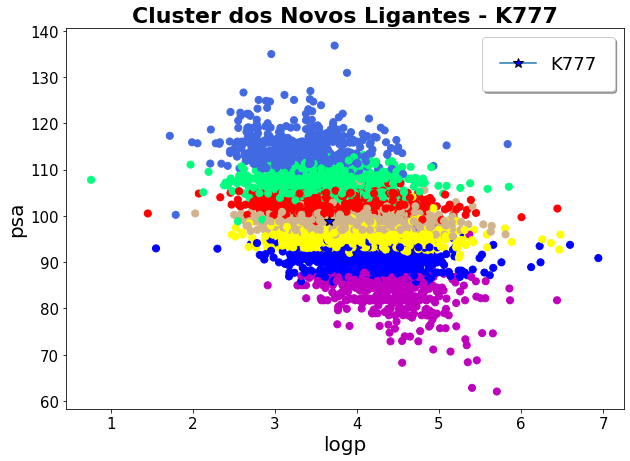

In [31]:
figure = plt.figure(figsize=(10,7))
plt.scatter(x=df.logp, y=df.tpsa, c=df.knn.map(colors), s=50)
plt.xlabel('logp', fontsize=20)
plt.ylabel('psa', fontsize=20)
plt.title("Cluster dos Novos Ligantes - K777", fontsize=22, weight="bold")
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
alvo_mark = plt.plot(target['logp'], target['tpsa'], marker="*", markersize=10, markeredgecolor="black", markerfacecolor="blue", label="K777")
plt.legend(handles=alvo_mark, fancybox=True, framealpha=1, shadow=True, borderpad=1, fontsize=18)
plt.show()

In [34]:
figure.savefig("imagens/k777_cluster")

In [22]:
busca_cluster = df.query("knn == 0")

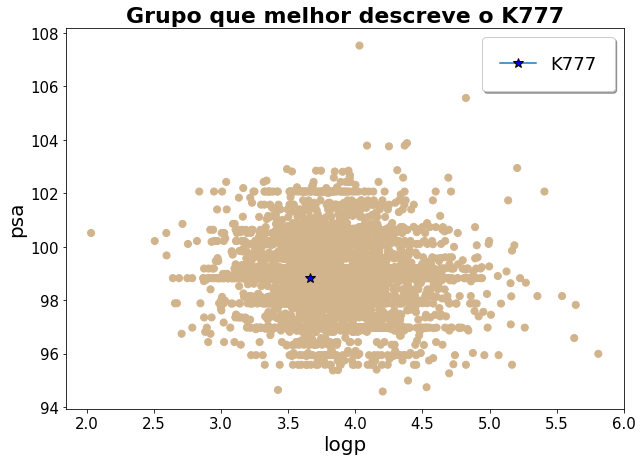

In [32]:
figura_2 = plt.figure(figsize=(10,7))
plt.scatter(x=busca_cluster.logp, y=busca_cluster.tpsa, c=busca_cluster.knn.map(colors), s=50)
plt.title("Grupo que melhor descreve o K777", fontsize=22, weight="bold")
plt.xlabel('logp', fontsize=20)
plt.ylabel('psa', fontsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
alvo_mark = plt.plot(target['logp'], target['tpsa'], marker="*", markersize=10, markeredgecolor="black", markerfacecolor="blue", label="K777")
plt.legend(handles=alvo_mark, fancybox=True, framealpha=1, shadow=True, borderpad=1, fontsize=18)
plt.show()

In [33]:
figura_2.savefig("imagens/k777_cluster_descript")

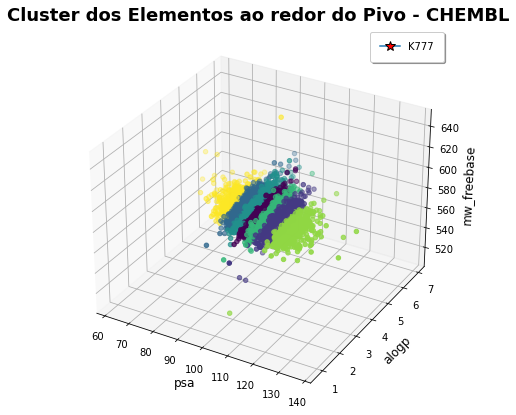

In [25]:
plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
plt.title("Cluster dos Elementos ao redor do Pivo - CHEMBL", fontsize=18, weight="bold")
plt.xlabel("psa", fontsize=12)
plt.ylabel("alogp", fontsize=12)
ax.set_zlabel('mw_freebase', fontsize=12)
plt.legend(handles=alvo_mark, fancybox=True, framealpha=1, shadow=True, borderpad=1, fontsize=10)
ax.scatter3D(df.tpsa, df.logp, df.molwt, c=grupos_novos_ligs);
plt.plot(target["tpsa"], target["logp"], target['molwt'], marker="*", markersize=15, markeredgecolor="red", markerfacecolor="red", label="Pivo")
plt.show()